# Task 10: SAXPY

SAXPY stands for "Single-Precision A · X Plus Y". This is a function in the Basic Linear Algebra Subprograms (BLAS) library. SAXPY is a combination of scalar multiplication and vector addition.

$$
C = AX + Y
$$

## Subtask 1: an explanation of the difference between cupu and numpy. How does cupy handle data transfers  between cpu and gpu?

In [1]:
import cupy as cp
import numpy as np

In [2]:
cp.cuda.Device()

<CUDA Device 0>

CuPy has a concept of the current device, which is the default device on which the allocation, manipulation, calculation etc. of arrays are taken place. 

CuPy -GPU, Numpy - CPU

cupy.asarray() can be used to move a numpy.ndarray, a list, or any object that can be passed to numpy.array() to the current device (GPU).

In [3]:
x_cpu = np.array([1, 2, 3])
x_gpu = cp.asarray(x_cpu)  # move the data to the current device.

Moving a device array to the host can be done by cupy.asnumpy():

In [4]:
x_gpu = cp.array([1, 2, 3])  # create an array in the current device
x_cpu = cp.asnumpy(x_gpu)  # move the array to the host.

We can also use cupy.ndarray.get():

In [5]:
x_cpu = x_gpu.get()

## Subtask 2: Function saxpy that runs on GPU using cupu is provied

In [6]:
def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

## Subtask 3: Graph - computation time vs size of arrays (for numpy and cupy)

In [7]:
np_results = []
for size in np.logspace(1, 4, 20):
    size = int(size)
    np_x = np.random.rand(size, size).astype(np.float32)
    np_y = np.random.rand(size, size).astype(np.float32)
    np_a = np.float32(5.0)
    t = %timeit -o -q np_saxpy(np_x, np_y, np_a);
    np_results.append(t)

In [8]:
np_results

[<TimeitResult : 1.52 µs ± 5.59 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 1.6 µs ± 81.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 1.79 µs ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>,
 <TimeitResult : 2.02 µs ± 16 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 2.41 µs ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 3.64 µs ± 649 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 4.46 µs ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 7.53 µs ± 65.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 14.8 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 30.7 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)>,
 <TimeitResult : 54.3 µs ± 910 ns per loop (mean ± std. dev. of 

In [9]:
cp_results = []
for size in cp.logspace(1, 4, 20):
    size = int(size)
    cp_x = cp.random.rand(size, size).astype(cp.float32)
    cp_y = cp.random.rand(size, size).astype(cp.float32)
    cp_a = cp.float32(2.0)
    t = %timeit -o -q np_saxpy(cp_x, cp_y, cp_a);
    cp_results.append(t)

In [10]:
cp_results

[<TimeitResult : 30.8 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)>,
 <TimeitResult : 18.4 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.8 µs ± 302 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.2 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.8 µs ± 71.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.8 µs ± 64.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.7 µs ± 28.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.7 µs ± 107 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 18.6 µs ± 44.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 19.2 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>,
 <TimeitResult : 29.5 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 1

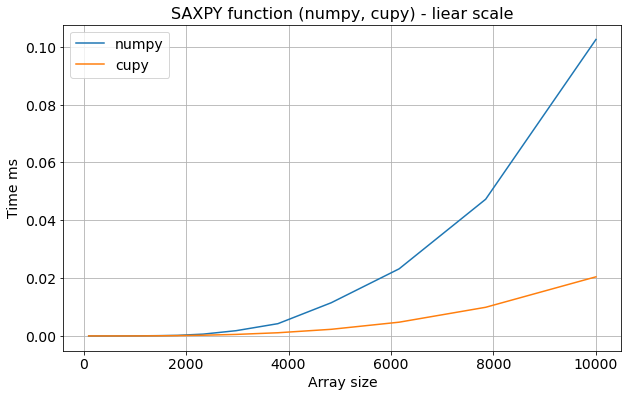

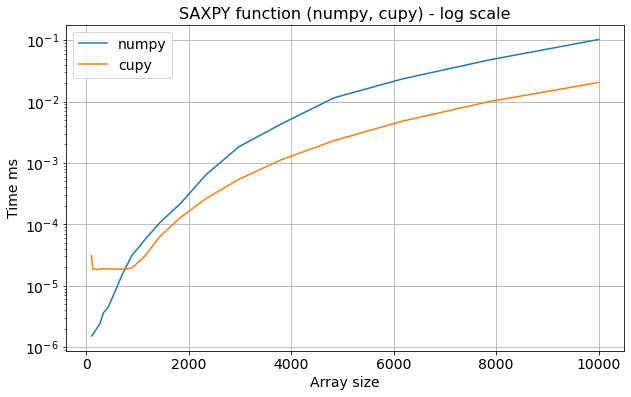

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.average for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.average for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - liear scale', fontsize=16)
#plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 4, 20), [i.average for i in np_results])
plt.plot(np.logspace(2, 4, 20), [i.average for i in cp_results])
plt.title('SAXPY function (numpy, cupy) - log scale', fontsize=16)
plt.yscale('log')
plt.xlabel('Array size', fontsize=14)
plt.ylabel('Time ms', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['numpy', 'cupy'], fontsize=14);
plt.grid()
plt.show()